# 버섯 데이터 분류
- 버섯 데이터와 모델을 이용하여, 식용 버섯과 독버섯을 구분해본다
- 특성 중요도롤 확인한다
- 교차 검증을 활용한다

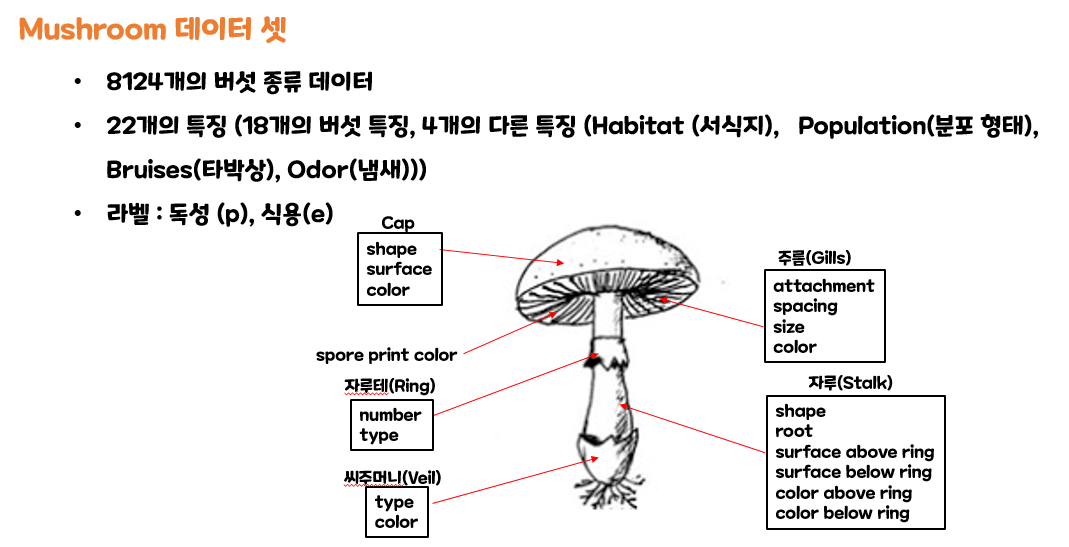




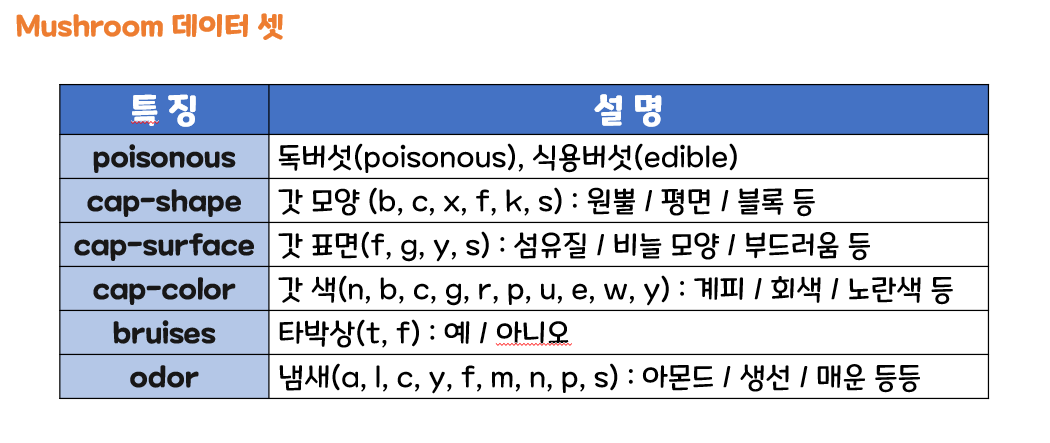

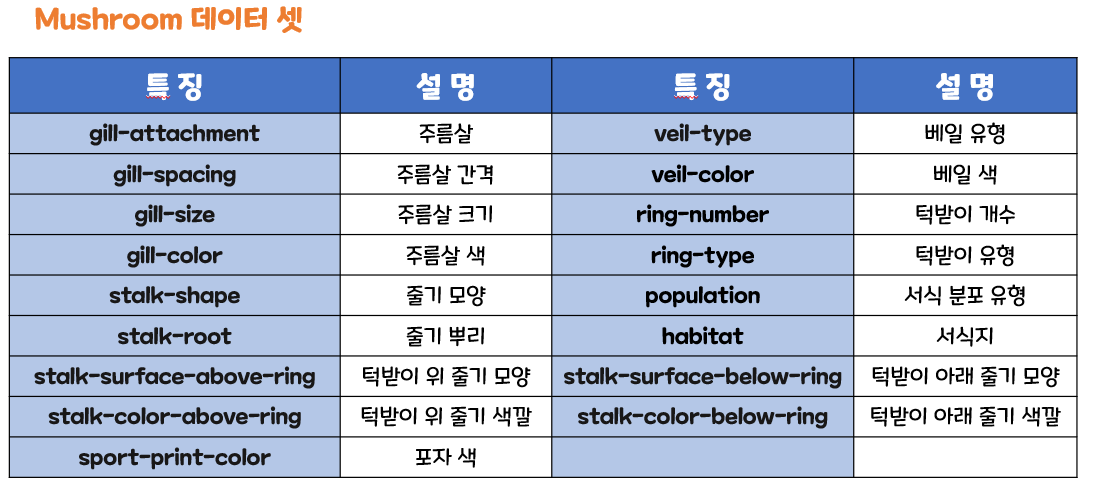

In [5]:
# !pip install matplotlib
# !pip install pandas


In [6]:
# 필요한 라이브러리 import

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [7]:
url = './data/mushroom.csv' 
data = pd.read_csv(url)
data.head(3)

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [8]:
data.info()

# 모든 데이터는 결측치(NUll)이 없다.
# 모든 데이터는 object다 -> 문자형이다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

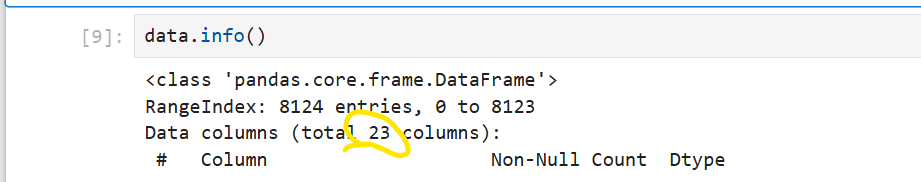

### 정답인 poisonous를 포함한 23가지 column이 있음. 즉, 정답을 빼면 22가지의 특성을 가진 것

In [10]:
# 문제 데이터와 정답 데이터를 분리

X = data.drop(columns=['poisonous'])
X.shape
print(f'X.shape = {X.shape}')

y = data['poisonous']
print(f'y.shape = {y.shape}')
  

X.shape = (8124, 22)
y.shape = (8124,)


In [11]:
X['odor'][5]

'a'

In [12]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### encoding / binning

- encoding : 문자형 / 번주형 -> 수치형 변환, 대표적으로 one-hot encoding, Label encoding
- binning : 수치형 -> 범주형 변환

In [14]:
# Label encoding 실습
data['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [15]:
cap_dict = {'x' : 0, 'b' : 1, 's' : 2, 'f' : 3, 'k' : 4, 'c' : 5}

data['cap-shape'].map(cap_dict).head(10)

0    0
1    0
2    1
3    0
4    0
5    0
6    1
7    1
8    0
9    1
Name: cap-shape, dtype: int64

- 라벨 인코딩을 사용할때 주의할 점.
-      - 숫자는 기본적으로 크기라는 개념을 가지고 이씅ㅁ
-      - 크기라는 개염은 모델이 중요도로 판별해서 학습과 예측에 영향을 미칠수가 있음
-      - 성형 회귀에서 라벨 인코딩을 사용하지 않음
-      - 주요 사용처 : 분류 모델에 정답을 인코딩 하는 경우에 주로 사용

In [17]:
# 원 핫 인코딩 진행하기
# 특성의 고유값 만큼 컬럼의 수를 증가시킨 후 해당하는 값(True) = 1 / 나머지 = 0 을 반환
X_one_hot = pd.get_dummies(X, dtype = 'int')
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


- 인코딩 시 주의점
    - Train 데이터와 Test 데이터가 분할된 경우 같은 인코딩 방식을 취해야 된다
    - 서로 다른 인코딩 방식을 취하는 경우 에러가 발생한다.
    - 가장 베스트는, 데이터가 병합 된 상태라면 인코딩을 진행한 후 데이터를 분할하는 방식이 효율적이다.

In [19]:
# pip install scikit-learn

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_one_hot, y, test_size=0.3, random_state=10
)

In [22]:
X_train.shape
# 중간 체크를 위해 꼭 shape를 써서 데이터를 확인할 것

(5686, 117)

### 데이터 모델링
- 트리 모델 사용해보기

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
treel = DecisionTreeClassifier()
treel

DecisionTreeClassifier()

In [26]:
treel.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
treel.score(X_test, y_test)

1.0

### 트리모델 시각화 해보기
1. graphviz 환경 설정
2. 트리 모델 구조 .dot 파일로 저장하기
3. 저장한 .dot 파일을 불러와서 출력하기

In [29]:
# !pip install graphviz

In [30]:
# 라이브러리 불러오기 
from sklearn.tree import export_graphviz

In [31]:
export_graphviz(
                treel, 
                out_file = 'tree1.dot', # 파일경로, 파일명, 확장자 지정
                feature_names = X_train.columns, # 특성 이름 지정 
                class_names = ['p', 'e'], # 정답 이름 지정
                filled = True, # 색상을 채우기
                impurity = True # 지니 불순도 출력 여부
               )

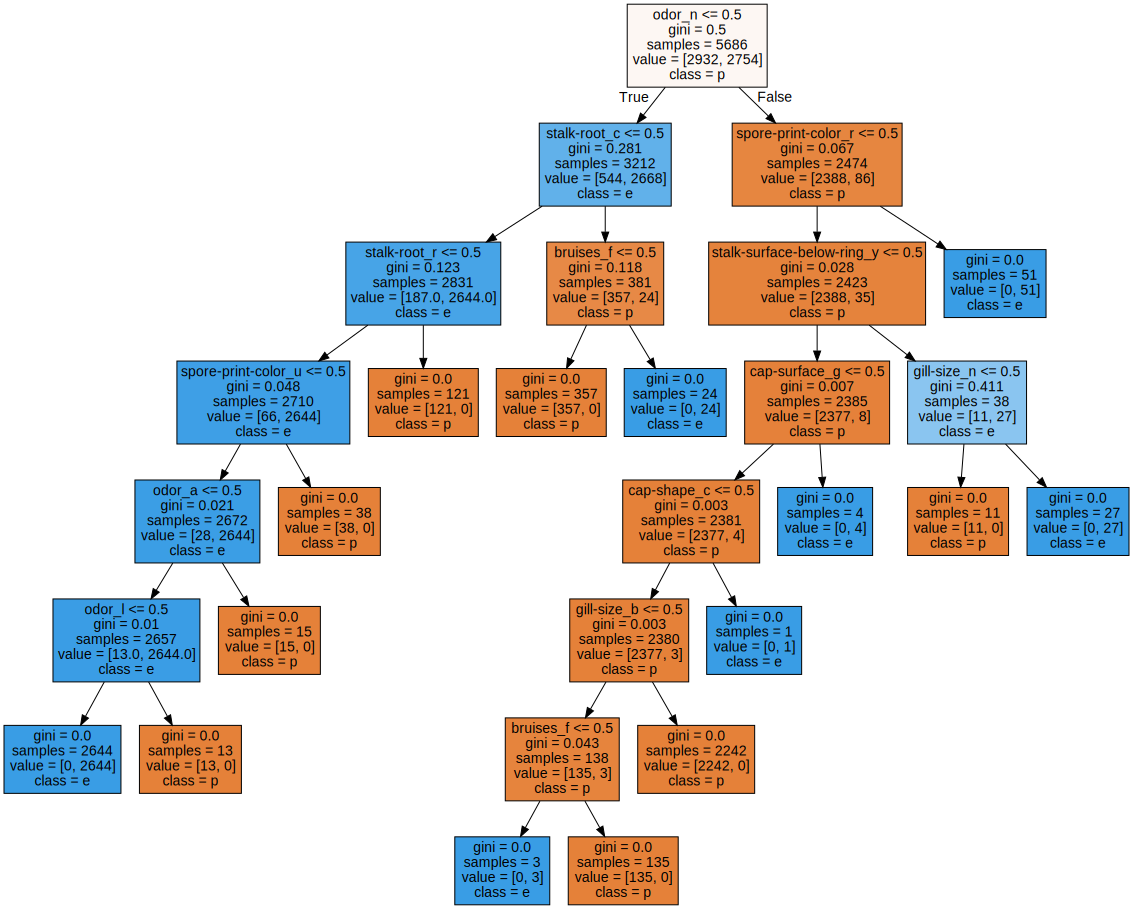

In [32]:
import graphviz
with open('tree1.dot') as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [33]:
# 사전 가지치기(하이퍼 파라미터 튜닝)
tree_2 = DecisionTreeClassifier(max_depth = 4)

In [34]:
# 모델 학습 
tree_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [35]:
tree_2.score(X_test, y_test)

0.9917965545529123

In [36]:
export_graphviz(
                tree_2, 
                out_file = 'tree_2.dot', # 파일경로, 파일명, 확장자 지정
                feature_names = X_train.columns, # 특성 이름 지정 
                class_names = ['p', 'e'], # 정답 이름 지정
                filled = True, # 색상을 채우기
                impurity = True # 지니 불순도 출력 여부
               )

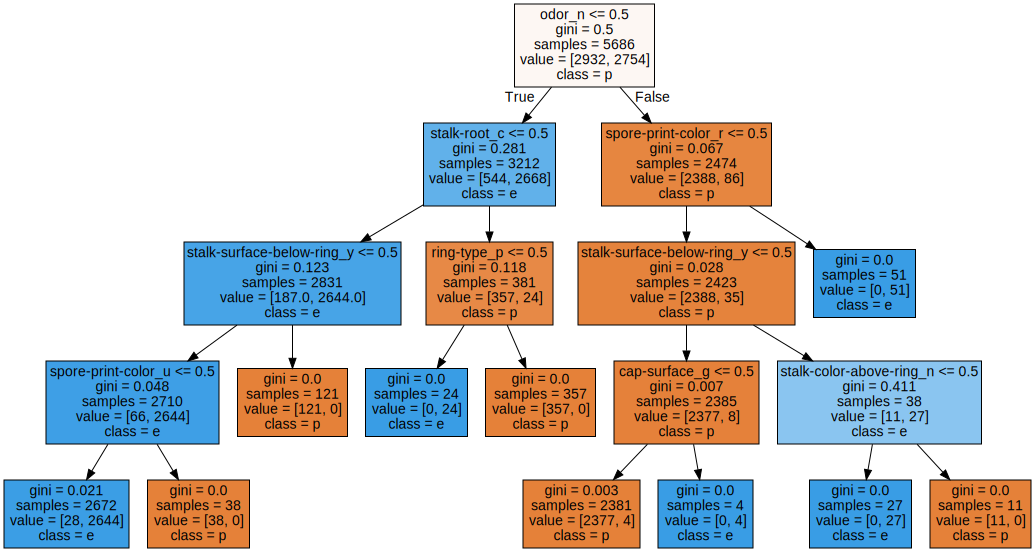

In [37]:
import graphviz
with open('tree_2.dot') as f :
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

# 특성 중요도 살펴보기

In [39]:
df = pd.DataFrame(treel.feature_importances_,
            index = X_train.columns,
            columns = ['importance']).sort_values(by = 'importance',ascending = False) # 특성 중요도 살펴 보기

In [40]:
# 전체 중요도는 1
df.sum() * 100

importance    100.0
dtype: float64

In [41]:
df

,importance
odor_n,0.623355
stalk-root_c,0.179373
stalk-root_r,0.077639
spore-print-color_r,0.034164
spore-print-color_u,0.025833
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-spacing_w,0.000000


### 특성 중요도와 트리모델 시각화 결과 분석하기
- root_node를 살펴봤을 때 odor_n이라는 특성을 제일 먼저 사용한 것으로 확인
- 특성 중요도가 가장 높은 순으로 내림차순 정렬을 했을 때 oder_n의 특성 중요도가 가장 높은 것으로 확인
- gini 불순도가 가장 빠르게 낮아지는 특성을 고려했을 때 특성 중요도가 가장 높은 odor_n 컬럼을 최우선적으로 고려한 것을 살펴볼 수 있다.
- odor_m 이라는 컬럼을 이용해서 데이터를 분리했을 때 효과적으로 데이터를 분리할 수 있었고, odor_n 컬럼을 최우선 고려했을 때 모델의 성능이 올라가는 것을 확인할 수 있었다.

In [43]:
# 교차검증 실행
from sklearn.model_selection import cross_val_score

In [44]:
cv_num = 5

In [45]:
rs_train = cross_val_score(tree_2, X_train, y_train, cv = cv_num)
print(rs_train)
print(rs_train.mean())

[0.99209139 0.99296394 0.99208443 0.99648197 0.99384345]
0.9934930358155846


In [46]:
rs_test = cross_val_score(tree_2, X_test, y_test, cv = cv_num)
print(rs_test)
print(rs_test.mean())

[0.98360656 1.         0.99180328 0.97946612 1.        ]
0.9909751910324166


In [47]:
print(f'{rs_train.mean()}')

0.9934930358155846


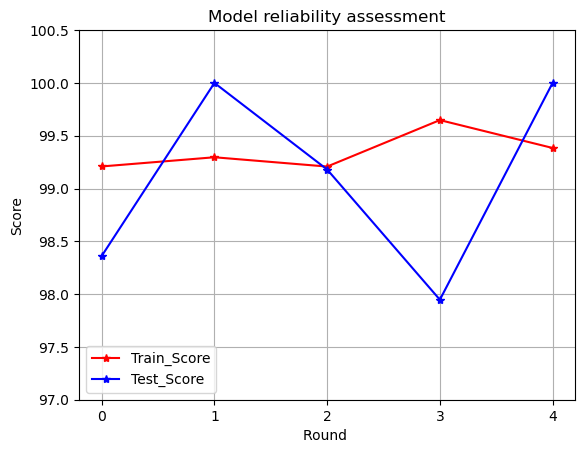

In [48]:
print_rs_train = []
print_rs_test = []

for i in range(len(rs_train)) :
    temp = round(rs_train[i], 5) * 100
    print_rs_train.append(temp)

    
for i in range(len(rs_test)) :
    temp = round(rs_test[i], 5) * 100
    print_rs_test.append(temp) 

plt.plot(print_rs_train, color='red', marker='*')
plt.plot(print_rs_test, color='blue', marker='*')
 
plt.title('Model reliability assessment')
plt.xlabel('Round ')
plt.ylabel('Score')
plt.grid()
plt.xticks(range(0, len(print_rs_train), 1))

plt.ylim(97, 100.5)

plt.legend(['Train_Score', 'Test_Score'])

# 그래프 표시
plt.show()


In [49]:
# 재현율(Recall)의 다른 이름??? : 적중률
# 